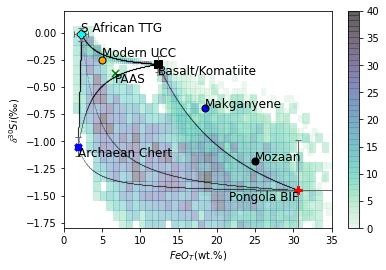

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# Our diamictite data
Mozaan_Si_Iso = -1.18
Mozaan_Iron = 25
Makganyene_Si_Iso = -0.69
Makganyene_Iron = 18.4

# Savage et al., 2014
Basalt_Si_Iso = -0.29
Basalt_Si_iso_sd = 0.07
# BHVO2 Iron content
Basalt_Iron = 12.3

# Rudnick and Gao, 2014
Avg_UCC_Iron = 5.04
# Savage et al., 2013
Avg_UCC_Si_Iso = -0.25

# South African TTG isotope sources: Andre et al., 2019 and Deng et al., 2019
TTG_Si_Iso = [np.random.normal(loc=-0.01486, scale=0.0566,size= 10000)]
TTG_Si_Iso_sd = np.std(a= TTG_Si_Iso)
TTG_Si_Iso_avg = np.mean(a= TTG_Si_Iso)
# South African TTG Iron sources: Andre et al., 2019 and Deng et al., 2019
TTG_Iron = [np.random.normal(loc=2.3096, scale=0.9064,size=10000)]
TTG_Iron_sd = np.std(a= TTG_Iron)
TTG_Iron_avg = np.mean(a= TTG_Iron)
# Pongola BIF isotope source: Delvigne et al., 2012
BIF_Si_Iso = [np.random.normal(loc=-1.4499, scale=0.4592, size=10000)]
BIF_Si_Iso_sd = np.std(a= BIF_Si_Iso)
BIF_Si_Iso_avg = np.mean(a= BIF_Si_Iso)
# Pongola BIF iron source: Ramanaidou and Wells, 
BIF_Iron = [np.random.normal (loc=30.6857, scale=5, size=10000)]
BIF_Iron_sd = np.std(a= BIF_Iron)
BIF_Iron_avg = np.mean(a= BIF_Iron)
# Archaean chert isotope sources: Van den Boorn et al., 2007 and 2010, Steinhoefel et al., 2009, Chakrabarti et al., 2012, Delvigne et al., 2012
Chert_Si_Iso = [np.random.normal(loc=-1.051, scale=.086, size=10000)]
Chert_Si_Iso_sd = np.std(a= Chert_Si_Iso)
Chert_Si_Iso_avg = np.mean(a= Chert_Si_Iso)
# Archaean chert iron sources: Van den Boorn et al., 2007 and 2010, Steinhoefel et al., 2009, Chakrabarti et al., 2012, Delvigne et al., 2012
Chert_Iron = [np.random.normal(loc=1.8622, scale=6.5395, size=10000)]
Chert_Iron_sd = np.std(a= Chert_Iron)
Chert_Iron_avg = np.mean(a= Chert_Iron)
# PAAS isotope source: Savage et al., 2013
PAAS_Si_Iso = [np.random.normal(loc=-.37409, scale=.23856, size=10000)]
PAAS_Si_Iso_sd =np.std(a= PAAS_Si_Iso)
PAAS_Si_Iso_avg = np.mean(a= PAAS_Si_Iso)
#PAAS iron source: Nance and Taylor 1995
PAAS_Iron = [np.random.normal(loc=6.7, scale=1.35957, size=10000)]
PAAS_Iron_sd =np.std(a= PAAS_Iron)
PAAS_Iron_avg = np.mean(a= PAAS_Iron)
f_b_values = np.linspace(0, 1, 10000, dtype=float)
f_a_values = np.linspace (1, 0, 10000, dtype=float)

#TTG and Basalt mixing line
TTG_Fe_fa = np.multiply(TTG_Iron,f_a_values)
TTG_Fe_fa = TTG_Fe_fa.T
Basalt_Fe_fb = np.multiply(Basalt_Iron,f_b_values)
Basalt_Fe_fb = Basalt_Fe_fb.T
data = pd.DataFrame(f_a_values)
data['TTG Fe fa'] = TTG_Fe_fa
data['Bas Fe fb']= Basalt_Fe_fb
data["TB X mix value"] = data['TTG Fe fa'] + data['Bas Fe fb']
TTG_Iso_fa = np.multiply(TTG_Si_Iso,f_a_values)
TTG_Iso_fa = TTG_Iso_fa.T
Basalt_Iso_fb = np.multiply(Basalt_Si_Iso,f_b_values)
Basalt_Iso_fb = Basalt_Iso_fb.T
data['TTG Iso fa'] = TTG_Iso_fa
data['Bas Iso fb']= Basalt_Iso_fb
TTG_Fe = np.array(TTG_Iron)
TTG_Fe = TTG_Fe.T
Bas_Iron = np.full((10000), 12.3, dtype=float)
data['TTG Iron']= TTG_Fe
data['Bas Iron']= Bas_Iron
data['TTG Fe div X']= data['TTG Iron']/data['TB X mix value']
data['Bas Fe div X']= data['Bas Iron']/data['TB X mix value']
data['TB Y mix value']= data['TTG Iso fa']*data['TTG Fe div X']+data['Bas Iso fb']*data['Bas Fe div X']

data.to_excel('TB Fe.xlsx', index = False)

# Chert and Basalt mixing line
Chert_Fe_fa = np.multiply(Chert_Iron,f_a_values)
Chert_Fe_fa = Chert_Fe_fa.T
Basalt_Fe_fb = np.multiply(Basalt_Iron,f_b_values)
Basalt_Fe_fb = Basalt_Fe_fb.T
data6 = pd.DataFrame(f_a_values)
data6['Chert Fe fa'] = Chert_Fe_fa
data6['Bas Fe fb']= Basalt_Fe_fb
data6["CB X mix value"] = data6['Chert Fe fa'] + data6['Bas Fe fb']
Chert_Iso_fa = np.multiply(Chert_Si_Iso,f_a_values)
Chert_Iso_fa = Chert_Iso_fa.T
Basalt_Iso_fb = np.multiply(Basalt_Si_Iso,f_b_values)
Basalt_Iso_fb = Basalt_Iso_fb.T
data6['Chert Iso fa'] = Chert_Iso_fa
data6['Bas Iso fb']= Basalt_Iso_fb
Chert_Fe = np.array(Chert_Iron)
Chert_Fe = Chert_Fe.T
Bas_Iron = np.full((10000), 50, dtype=float)
data6['Chert Iron']= Chert_Fe
data6['Chert Fe div X']= data6['Chert Iron']/data6['CB X mix value']
data6['Bas Fe div X']= data['Bas Iron']/data6['CB X mix value']
data6['CB Y mix value']= data6['Chert Iso fa']*data6['Chert Fe div X']+data6['Bas Iso fb']*data6['Bas Fe div X']

data6.to_excel('CB Fe.xlsx', index = False)

# TTG and Chert mixing line
Chert_Fe_fb = np.multiply(Chert_Iron,f_b_values)
Chert_Fe_fb = Chert_Fe_fb.T
TTG_Fe_fa = np.multiply(TTG_Iron,f_a_values)
TTG_Fe_fa = TTG_Fe_fa.T
data2 = pd.DataFrame(f_a_values)
data2['Chert Fe fb'] = Chert_Fe_fb
data2['TTG Fe fa']= TTG_Fe_fa
data2["TC X mix value"] = data2['Chert Fe fb'] + data2['TTG Fe fa']
Chert_Iso_fb = np.multiply(Chert_Si_Iso,f_b_values)
Chert_Iso_fb = Chert_Iso_fb.T
TTG_Iso_fa = np.multiply(TTG_Si_Iso,f_a_values)
TTG_Iso_fa = TTG_Iso_fa.T
data2['Chert Iso fb'] = Chert_Iso_fb
data2['TTG Iso fa']= TTG_Iso_fa
Chert_Fe = np.array(Chert_Iron)
Chert_Fe = Chert_Fe.T
data2['Chert Iron']= Chert_Fe
data2['Chert Fe div X']= data2['Chert Iron']/data2["TC X mix value"]
data2['TTG Fe div X 2']= data['TTG Iron']/data2["TC X mix value"]
data2['TC Y mix value']= data2['Chert Iso fb']*data2['Chert Fe div X']+data2['TTG Iso fa']*data2['TTG Fe div X 2']

data2.to_excel('TC Fe.xlsx', index = False)

# BIF and Chert mixing line
BIF_Fe_fb = np.multiply(BIF_Iron,f_b_values)
BIF_Fe_fb = BIF_Fe_fb.T
Chert_Fe_fa = np.multiply(Chert_Iron,f_a_values)
Chert_Fe_fa = Chert_Fe_fa.T
data3 = pd.DataFrame(f_a_values)
data3['BIF Fe fb'] = BIF_Fe_fb
data3['Chert Fe fa']= Chert_Fe_fa
data3["BC X mix value"] = data3['BIF Fe fb'] + data3['Chert Fe fa']
BIF_Iso_fb = np.multiply(BIF_Si_Iso,f_b_values)
BIF_Iso_fb = BIF_Iso_fb.T
Chert_Iso_fa = np.multiply(Chert_Si_Iso,f_a_values)
Chert_Iso_fa = Chert_Iso_fa.T
data3['BIF Iso fb'] = BIF_Iso_fb
data3['Chert Iso fa']= Chert_Iso_fa
BIF_Fe = np.array(BIF_Iron)
BIF_Fe = BIF_Fe.T
data3['BIF Iron']= BIF_Fe
data3['BIF Fe div X']= data3['BIF Iron']/data3["BC X mix value"]
data3['Chert Fe div X 2']= data2['Chert Iron']/data3["BC X mix value"]
data3['BC Y mix value']= data3['BIF Iso fb']*data3['BIF Fe div X']+data3['Chert Iso fa']*data3['Chert Fe div X 2']

data3.to_excel('BC Fe.xlsx', index = False)

# Basalt and BIF mixing line
Basalt_Fe_fa = np.multiply(Basalt_Iron,f_a_values)
Basalt_Fe_fa = Basalt_Fe_fa.T
BIF_Fe_fb = np.multiply(BIF_Iron,f_b_values)
BIF_Fe_fb = BIF_Fe_fb.T
data4 = pd.DataFrame(f_a_values)
data4['Bas Fe fa'] = Basalt_Fe_fa
data4['BIF Fe fb']= BIF_Fe_fb
data4["BB X mix value"] = data4['Bas Fe fa'] + data4['BIF Fe fb']
Bas_Iso_fa = np.multiply(Basalt_Si_Iso,f_a_values)
Bas_Iso_fa = Bas_Iso_fa.T
BIF_Iso_fb = np.multiply(BIF_Si_Iso,f_b_values)
BIF_Iso_fb = BIF_Iso_fb.T
data4['Bas Iso fa'] = Bas_Iso_fa
data4['BIF Iso fb']= BIF_Iso_fb
data4['Bas Fe div X']= data['Bas Iron']/data4["BB X mix value"]
data4['BIF Fe div X']= data3['BIF Iron']/data4["BB X mix value"]
data4['BB Y mix value']= data4['Bas Iso fa']*data4['Bas Fe div X']+data4['BIF Iso fb']*data4['BIF Fe div X']
data4.to_excel('BB Fe.xlsx', index = False)

# BIF and TTG mixing line
TTG_Fe_fa = np.multiply(TTG_Iron,f_a_values)
TTG_Fe_fa = TTG_Fe_fa.T
data5 = pd.DataFrame(f_a_values)
data5['TTG Fe fa'] = TTG_Fe_fa
data5['BIF Fe fb']= BIF_Fe_fb
data5['BT X mix value'] = data5['TTG Fe fa'] + data5['BIF Fe fb']
data5['TTG Iso fa'] = TTG_Iso_fa
data5['BIF Iso fb']= BIF_Iso_fb
data5['TTG Fe div X']= data['TTG Iron']/data5['BT X mix value']
data5['BIF Fe div X']= data3['BIF Iron']/data5['BT X mix value']
data5['BT Y mix value']= data5['TTG Iso fa']*data5['TTG Fe div X']+data5['BIF Iso fb']*data5['BIF Fe div X']
data5.to_excel('BT Fe.xlsx', index = False)

data7 = pd.read_excel('MC data Fe.xlsx')

trendline_data = pd.read_excel('Fe mixing trendline.xlsx')



import matplotlib.pyplot as plt
x = ([data['TB X mix value']])
y = ([data['TB Y mix value']])

sns.histplot(data=data, x="TB X mix value", y="TB Y mix value", bins=50, pthresh=.1, cmap="mako_r",alpha=0.4)

x2= (data2['TC X mix value'])
y2= (data2['TC Y mix value'])


x3= (data3['BC X mix value'])
y3= (data3['BC Y mix value'])


x4 = (data4['BB X mix value'])
y4 = (data4['BB Y mix value'])

sns.histplot(data=data4, x="BB X mix value", y="BB Y mix value", bins=50, pthresh=.1, cmap="mako_r",alpha=0.4)

x5 = (data5['BT X mix value'])
y5 = (data5['BT Y mix value'])

sns.histplot(data=data5, x="BT X mix value", y="BT Y mix value", bins=50, pthresh=.1, cmap="mako_r", alpha=0.4, cbar= True, vmax=40)

x6 = (data6['CB X mix value'])
y6 = (data6['CB Y mix value'])


axes = plt.gca()
axes.set_xlim([0,35])
axes.set_ylim([-1.8, 0.2])
axes.set_xlabel('$FeO_T$(wt.%)')
axes.set_ylabel('$𝛿^{30}Si(‰)$')

plt.rcParams.update({'font.size': 12})

TTG_x = TTG_Iron_avg
TTG_y = TTG_Si_Iso_avg
plt.scatter(TTG_x,TTG_y,s=50, c="cyan", edgecolor='black', marker="D")
plt.errorbar(TTG_x, TTG_y, xerr= .91, yerr = .06, fmt= 'P',color="cyan", ecolor='dimgrey', capsize=3, elinewidth=1)
plt.text(TTG_x,TTG_y,'S African TTG', va='bottom')
BIF_x = BIF_Iron_avg
BIF_y = BIF_Si_Iso_avg
plt.scatter(BIF_x,BIF_y,s=55, c="red",marker="P")
plt.errorbar(BIF_x, BIF_y, xerr= 5, yerr = .46, fmt= 'P',color="red", ecolor='dimgrey', capsize=3, elinewidth=1)
plt.text(BIF_x,BIF_y,'Pongola BIF', va='top', ha='right')
Chert_x = Chert_Iron_avg
Chert_y = Chert_Si_Iso_avg
plt.scatter(Chert_x,Chert_y,s=55, c="blue",marker="X")
plt.errorbar(Chert_x, Chert_y, xerr= .09, yerr = .09, fmt= 'P',color="blue", ecolor='dimgrey', capsize=3, elinewidth=1)
plt.text(Chert_x,Chert_y,'Archaean Chert', va='top')
Basalt_x = Basalt_Iron
Basalt_y = Basalt_Si_Iso
plt.scatter(Basalt_x,Basalt_y,s=50, c="black", marker="s")
plt.errorbar(Basalt_x, Basalt_y, xerr= 0, yerr = .07, fmt= 'P',color="black", ecolor='dimgrey', capsize=3, elinewidth=1)
plt.text(Basalt_x,Basalt_y,'Basalt/Komatiite', ha='left', va='top')
Avg_UCC_x= Avg_UCC_Iron
Avg_UCC_y= Avg_UCC_Si_Iso

plt.scatter(Avg_UCC_x,Avg_UCC_y,s=50, c="orange",edgecolor='black', marker="o")
plt.text(Avg_UCC_x,Avg_UCC_y, 'Modern UCC', va='bottom')

#Fe Komatiite source: Nesbitt et al 1979
Fe_Kom_x = 12.29
Fe_Kom_y = -0.29


Mozaan_x = Mozaan_Iron
Mozaan_y = Mozaan_Si_Iso
Makganyene_x=Makganyene_Iron
Makganyene_y= Makganyene_Si_Iso
plt.scatter([Makganyene_x], [Makganyene_y],s=50, c="blue", edgecolor='black')
plt.scatter([Mozaan_x],[Mozaan_y],s=50, c="black", edgecolor='black')
plt.text(Mozaan_x,Mozaan_y,'Mozaan', ha='left')
plt.text(Makganyene_x,Makganyene_y,'Makganyene', ha='left')
PAAS_x = PAAS_Iron_avg
PAAS_y = PAAS_Si_Iso_avg
plt.scatter(PAAS_x, PAAS_y, s=50, c="green", marker='x')
plt.text(PAAS_x, PAAS_y, 'PAAS', va='top')
plt.scatter([trendline_data['TCx'],trendline_data['TBx'],trendline_data['BTx'],trendline_data['BBx'], trendline_data['BCx'], trendline_data['CBx']],[trendline_data['TCy'],trendline_data['TBy'],trendline_data['BTy'],trendline_data['BBy'], trendline_data['BCy'], trendline_data['CBy']], s=0.015, c="black", marker='.')
plt.savefig('Femixingplot.svg', dpi=75, bbox_inches='tight')
plt.show()
